<a href="https://colab.research.google.com/github/Likhi-tech/Deep-learning-projects/blob/main/time_series_analysis_using_LSTM_for_weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow numpy pandas scikit-learn matplotlib

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import pandas as pd
# Replace 'your_weather_dataset.csv' with the actual file path of your weather dataset
weather_data = pd.read_csv('/content/weather_data.csv')
# For this example, we'll create synthetic data
np.random.seed(0)
data = np.sin(np.linspace(0, 100, 1000)) + np.random.normal(0, 0.1, 1000)
# Define the sequence length (how many past data points to consider)
sequence_length = 10
# Create sequences and labels
sequences = []
labels = []
for i in range(len(data) - sequence_length):
    sequences.append(data[i:i + sequence_length])
    labels.append(data[i + sequence_length])
# Convert sequences and labels to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)
# Split the data into training and testing sets
# Ensure that test set has some labels by leaving enough data points after removing sequence length
train_size = int(0.8 * (len(sequences)-sequence_length))
train_sequences, test_sequences = sequences[:train_size], sequences[train_size:]
train_labels, test_labels = labels[:train_size], labels[train_size:]
# Scale the data to [0, 1]
scaler = MinMaxScaler()
train_sequences = scaler.fit_transform(train_sequences)
test_sequences = scaler.transform(test_sequences)

# Reshape labels before scaling and ensure both train and test have samples
train_labels = scaler.fit_transform(train_labels.reshape(-1, 1))
test_labels = scaler.transform(test_labels.reshape(-1, 1)) # Now this should work

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
# Reshape the data for LSTM (samples, time steps, features)
train_sequences = train_sequences.reshape(-1, sequence_length, 1)
test_sequences = test_sequences.reshape(-1, sequence_length, 1)
# Train the model
model.fit(train_sequences, train_labels, epochs=50, batch_size=32, validation_data=(test_sequences, test_labels))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2855 - val_loss: 0.0636
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0432 - val_loss: 0.0286
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0275 - val_loss: 0.0191
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0184 - val_loss: 0.0146
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0145 - val_loss: 0.0096
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0084 - val_loss: 0.0044
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0048 - val_loss: 0.0033
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - val_loss: 0.0034
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - val_loss: 0.0028
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - val_loss: 0.0026
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0034 - val_loss: 0.0026
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - val_loss: 0.0023

In [6]:
# Make predictions on the test data
predicted_labels = model.predict(test_sequences)
# Inverse transform the scaled predictions and labels
predicted_labels = scaler.inverse_transform(predicted_labels)
test_labels = scaler.inverse_transform(test_labels)
# Calculate Mean Squared Error
mse = mean_squared_error(test_labels, predicted_labels)
print(f"Mean Squared Error: {mse}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Mean Squared Error: 0.01197189913725591


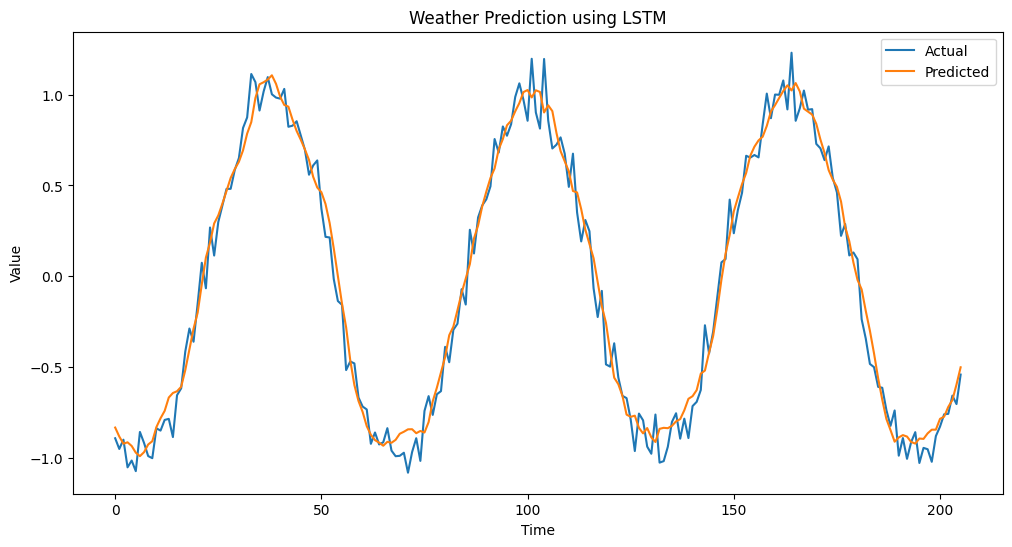

In [8]:
# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_labels, label='Actual')
plt.plot(predicted_labels, label='Predicted')
plt.legend()
plt.title("Weather Prediction using LSTM")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()